In [2]:
import os
import pandas as pd


# Keras functions
import tensorflow as tf

from keras.optimizers import Adam
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.layers import Dropout, LeakyReLU, BatchNormalization
from keras.layers import Activation, ZeroPadding2D, UpSampling2D
from keras.layers import Input, Reshape
from matplotlib import pyplot
from IPython.display import clear_output

# Numpy functions
import numpy
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from numpy import zeros
from numpy import ones
from numpy import asarray

#Torchvision for fast and easy loading and resizing
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from skimage.transform import resize



In [3]:
from tensorflow import keras
from skimage.transform import resize

model = keras.models.load_model('Art2/Model 2/')

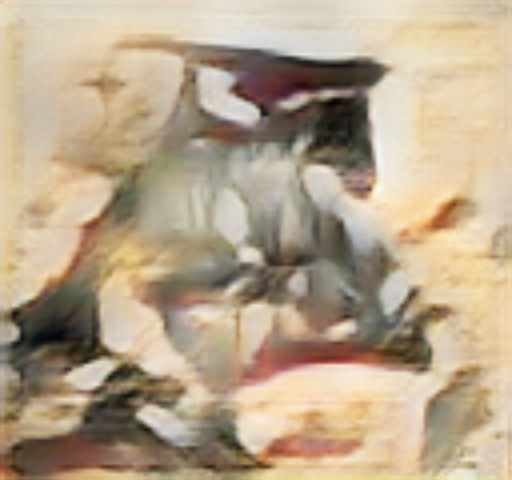

In [7]:
seed2 = tf.random.normal([32, 100])
generated_images2 = model(seed2, training = False)

bottle_resized = resize(generated_images2[4], (480, 512))

tf.keras.preprocessing.image.array_to_img(
    bottle_resized, data_format=None, scale=True, dtype=None
)


In [8]:
path = 'Art2/Temp Output/output.jpg'


tf.keras.preprocessing.image.save_img(path, bottle_resized, data_format=None, file_format=None, scale=True)
    
    

In [24]:
from flask import Flask
from flask import send_file
import tensorflow as tf
import keras

app = Flask(__name__)

model = keras.models.load_model('/Users/Main/Data_Science/Final-Project-main/Art2/Model 2/')
path = '/Users/Main/Data_Science/Final-Project-main/Art2/Temp Output/output.jpg'

@app.route('/')
def gen_image():
    seed2 = tf.random.normal([32, 100])
    generated_images2 = model(seed2, training = False)

    bottle_resized = resize(generated_images2[4], (480, 512))
    
    tf.keras.preprocessing.image.save_img(
    path, bottle_resized, data_format=None, file_format=None, scale=True, **kwargs)
    
    return send_file(path)


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True, threaded=True)

   
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
 * Restarting with fsevents reloader


SystemExit: 1

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from flask import Flask
from flask import send_file
import tensorflow as tf
import keras
from skimage.transform import resize


app = Flask(__name__)

model = keras.models.load_model('/Users/Main/Data_Science/Final-Project-main/Art2/Model 2/')
path = '/Users/Main/Data_Science/Final-Project-main/Art2/deploy_img/output.jpg'

@app.route('/')
def gen_image():

    seed2 = tf.random.normal([32, 100])
    generated_images2 = model(seed2, training = False)

    bottle_resized = resize(generated_images2[0], (480, 512))
        
    tf.keras.preprocessing.image.save_img(path, bottle_resized, data_format=None, file_format=None, scale=True)

    return send_file(path, cache_timeout=0) #Cache is an issue


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=False, threaded=True)


In [ ]:
#### Request and convert from online

In [10]:
import requests

r = requests.get('http://0.0.0.0:5000/')
file = open('Art2/request_img.png','wb')
file.write(r.content)
file.close()